In [7]:
# LSTM

In [375]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

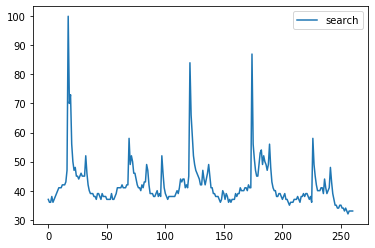

In [376]:
# Importing the dataset
ts = pd.read_csv('iPhone.csv')
ts.plot()

In [326]:
# Checking Stationarity
from statsmodels.tsa.stattools import adfuller
adf = adfuller(ts[['search']])
print('ADF Statistic: %f' % adf[0])
print('p-value: %f' % adf[1])
print('Critical Values:')
for key, value in adf[4].items():
    print('\t%s: %.3f' % (key, value))
# Conclusion:  The null hypothesis is rejected, the process has no unit root, the time series is stationary or does not have time-dependent structure.

ADF Statistic: -5.668556
p-value: 0.000001
Critical Values:
	1%: -3.456
	5%: -2.873
	10%: -2.573


In [377]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(-1, 1))
ts['sc'] = sc.fit_transform(ts[['search']])

In [378]:
# Creating lagged dataset
ts['x'] = ts[['sc']].shift(1)
ts.columns = ['t','search','y','x']

In [379]:
# Splitting the dataset into the Training set and Test set
train_size = int(len(ts[['x']]) * 0.7)
train, test = ts[1:train_size], ts[train_size:]
train_X, train_y = train[['x']].to_numpy(), train[['y']].to_numpy()
test_X, test_y = test[['x']].to_numpy(), test[['y']].to_numpy()

In [380]:
# Install Tensorflow
# Install Keras
# Importing the Keras libraries and packages
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [388]:
#np.random.seed(2147483648)
# Creating model
X, y = train_X, train_y
X = X.reshape(X.shape[0], 1, X.shape[1])
batch_size = 1
nb_epoch = 100
neurons = 5
lstm = Sequential()
lstm.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
lstm.add(Dense(1))

# Compiling
lstm.compile(loss='mean_squared_error', optimizer='adam')

# Fitting
for i in range(nb_epoch):
    lstm.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
    lstm.reset_states()

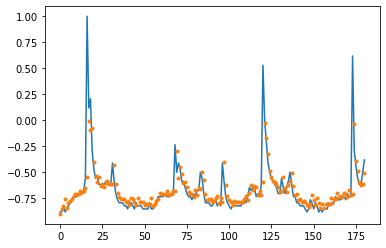

In [389]:
# Predicting scaled training set
yhat = lstm.predict(X, batch_size=batch_size)
from matplotlib import pyplot
pyplot.plot(y)
pyplot.plot(yhat, '.')
pyplot.show()

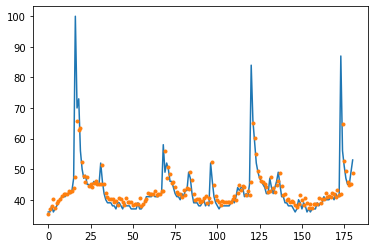

In [390]:
# Inversing scaling
tshat = pd.DataFrame(yhat, columns=['y']) 
from sklearn.preprocessing import MinMaxScaler
tshat['searchhat'] = sc.inverse_transform(tshat)
tshat['search'] = train['search'][0:].reset_index()['search']
pyplot.plot(tshat['search'])
pyplot.plot(tshat['searchhat'], '.')
pyplot.show()

In [391]:
# Reporting performance
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(tshat['search'], tshat['searchhat']))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 6.515


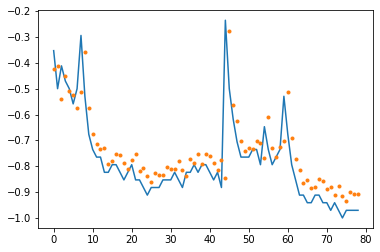

In [392]:
# Predicting scaled test set
X1, y1 = test_X, test_y
X1 = X1.reshape(X1.shape[0], 1, X1.shape[1])
yhat1 = lstm.predict(X1, batch_size=batch_size)
from matplotlib import pyplot
pyplot.plot(y1)
pyplot.plot(yhat1, '.')
pyplot.show()

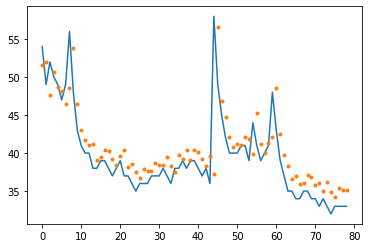

In [393]:
# Inversing scaling
tshat1 = pd.DataFrame(yhat1, columns=['y']) 
from sklearn.preprocessing import MinMaxScaler
tshat1['searchhat'] = sc.inverse_transform(tshat1)
tshat1['search'] = test['search'].reset_index()['search']
pyplot.plot(tshat1['search'])
pyplot.plot(tshat1['searchhat'], '.')
pyplot.show()

In [394]:
# Reporting performance
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(tshat1['search'], tshat1['searchhat']))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 3.533
